In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('../../data/test_images_3072/train_pixels.csv')
df

,x_start,y_start,x_end,y_end,long_start,long_end,lat_start,lat_end
0,0,0,3072,3072,-18.0,-6.0,6.0,-6.0
1,2048,0,5120,3072,-10.0,2.0,6.0,-6.0
2,4096,0,7168,3072,-2.0,10.0,6.0,-6.0
3,6144,0,9216,3072,6.0,18.0,6.0,-6.0


In [6]:
import numpy as np
ppm = 118 #m/pix
Rmoon = 1.737e6
mpd = np.pi*Rmoon/180 #m/deg
res = mpd/ppm #pix/deg
print(res)
print(3072/res)

256.91838226391104
11.957104715241387


Number of unique values: 66


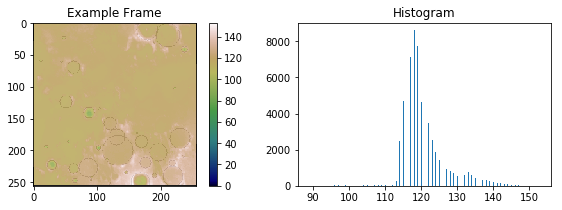

In [7]:
# show one example frmae: 
data_path = '../../data/test_images_3072/'
fn = data_path + 'train'
example = h5py.File(fn + '_images.hdf5', 'r')
im_num=1

fig = plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
plt.title('Example Frame')
plt.imshow(example['input_images'][im_num], aspect="equal", cmap="gist_earth")
plt.colorbar()
plt.imshow(1-example['target_masks'][im_num], aspect="equal", cmap="gray", alpha=0.1)
plt.subplot(1,2,2)
img_arr = np.concatenate(example['input_images'][im_num])
plt.hist(img_arr[img_arr>0], 256);
plt.title('Histogram')
print('Number of unique values: {}'.format(len(np.unique(img_arr))))